# INTRODUCTION

### Diabetes is a chronic disease and a major challenge across the world.  Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. There are certain populations which are very prone to different diseases in comparison to other populations.  

# Variables

| Variable | Explaination of Variable |
| :----- | :----- |
|**Pregnancies**| Pregnancies |
|**Glucose**| A fasting blood sugar level less than 100 mg/dL  is normal. A fasting blood sugar level from 100 to 125 mg/dL is considered prediabetes. If it's 126 mg/dL or higher on two separate tests, you have diabetes. |
|**Blood Pressure**| Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain. |
|**Skin Thickness**| Triceps skin fold thickness (mm) |
|**Insulin**| 2-Hour serum insulin (mu U/ml) |
|**BMI**| Body mass index (weight in kg/(height in m)^2) |
|**Diabetes Pedigree Function**| Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history. Age: indicates the age of the person. Outcome: indicates if the patient had a diabetes or not (1 = yes, 0 = no) |
|**Age**| Age (years) |
|**Outcome**| Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic |

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings # avoid warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading file. 
diabetes = pd.read_csv("/content/diabetes.csv")

# Basic Exploration of Data

In [ ]:
# head of the diabetes data.
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# tail of the diabetes data.
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes.shape   # so, it contains 768 rows and 9 columns.

(768, 9)

In [ ]:
diabetes.info()    # checking Dtype of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.duplicated()    # checking duplication.
                         # so, there is no duplication.

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
# converting Dtype of outcome column. because it shows 0 = "diabetes" and 1 = "no-diabetes"
diabetes["Outcome"] = diabetes["Outcome"].astype("category")

diabetes.info()    # checking Dtype 
                   # there is no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#Preliminary Analysis

In [ ]:
# renaming columns
diabetes = diabetes.rename(columns={" Pregnancies":"Pregnancy","Blood Pressure":"Blood_Pressure","Skin Thickness":"Skin_Thickness","Diabetes Pedigree Function":"Diabetes_Pedigree_Function"})
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes.nunique()    # checking uniqness of columns.

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
diabetes.describe(include="all")    # summary of the diabetes data.
                                    # in pregnancy column, there is max time pregnency is 17 which is not correct.
                                    # in BMI, min is 0 which is not correct.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


In [ ]:
# so, i am removing unwanted error in the data.
# i have made a criteria, if pregnany is above 10 then it would be nan.
diabetes["Pregnancies"] = diabetes["Pregnancies"].apply(lambda x: np.nan if x>10 else x)

In [ ]:
# again removing unwanted data and converting all zeros in nan.
diabetes["BMI"] = diabetes["BMI"].apply(lambda x: np.nan if x==0 else x)

# checking summary again.
diabetes.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,768.000000,768.000000,768.000000,768.000000,757.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.452316,120.894531,69.105469,20.536458,79.799479,32.457464,0.471876,33.240885,NaN
std,2.882849,31.972618,19.355807,15.952218,115.244002,6.924988,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.500000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


# Exploring feature of the data

In [ ]:
# so, 500 people are not suffering from diabetes.
# only 268 people are suffering from diabetes. which is not good 
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# calling mako palette.
sns.set_palette("mako")

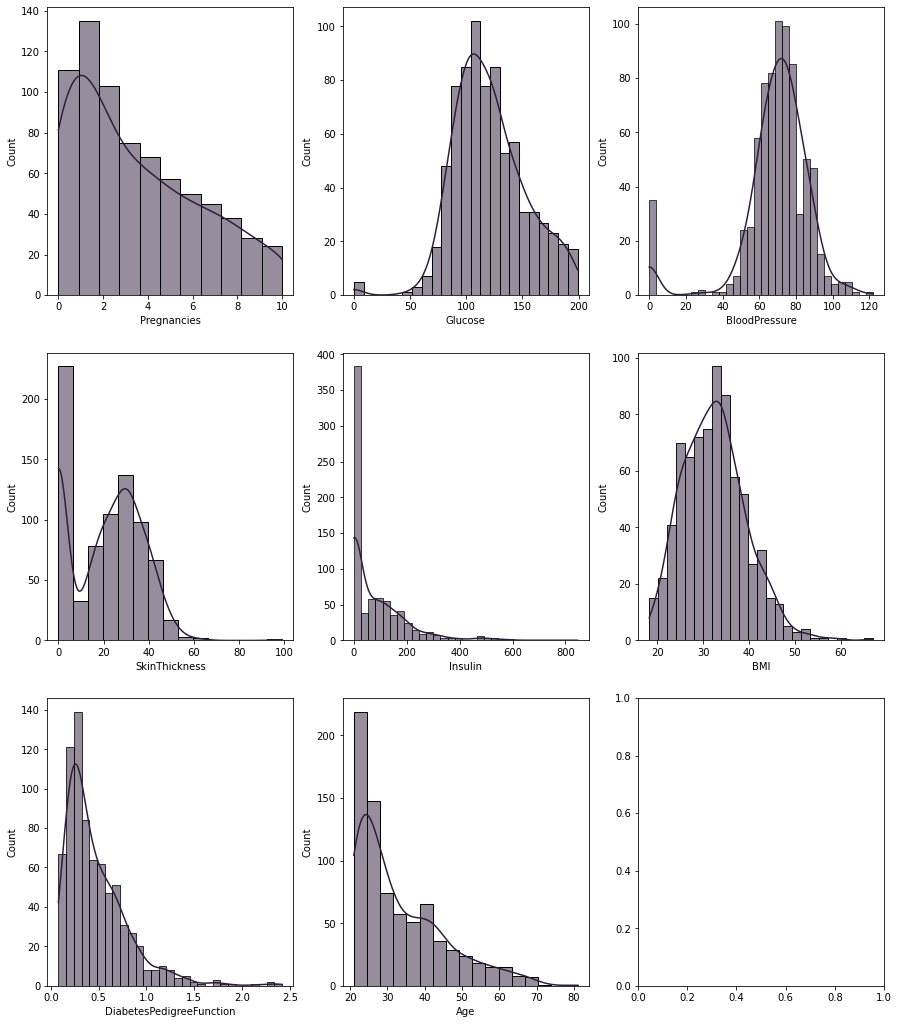

In [ ]:
# checking is skewness.
# all the data is skewed.

_,ax = plt.subplots(3,3, figsize=(15,18))
numericals = diabetes.select_dtypes(include="number").columns
for i in range(len(numericals)):
  sns.histplot(data=diabetes[numericals[i]], ax=ax[i//3][i%3], kde=True, palette= "mako")

# Outcome and target variable

Text(0.5, 1.0, 'relative frequency of diabetes by outcome')

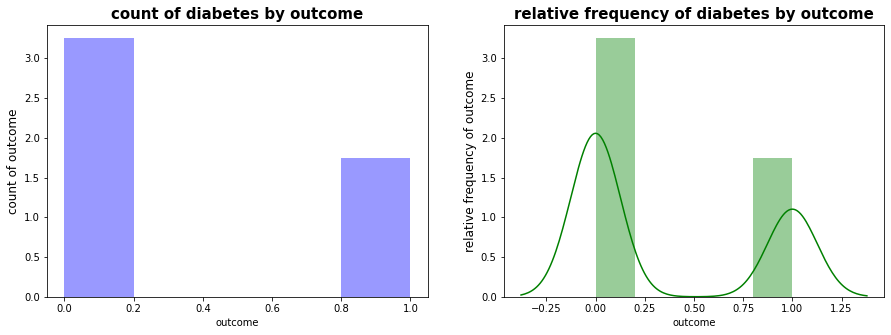

In [ ]:
# target variable is: outcome
# outcome will show how many people are suffering from diabetes or not.

fig, ax=plt.subplots(1,2, figsize=(15,5))
sns.distplot(diabetes["Outcome"], norm_hist=True, kde=False, ax=ax[0], color="blue")
ax[0].set_xlabel("outcome")
ax[0].set_ylabel("count of outcome", size=12)
ax[0].set_title("count of diabetes by outcome", size=15, weight="bold")

sns.distplot(diabetes["Outcome"], kde=True, ax=ax[1], color="green")
ax[1].set_xlabel("outcome")
ax[1].set_ylabel("relative frequency of outcome", size=12)
ax[1].set_title("relative frequency of diabetes by outcome", size=15, weight="bold")


# explanation:-
#  it is right skewed.
#  there are two type of people who are suffering from diabetes and some are not.
#  highest bar, shows people are not suffering from diabetes and it's range above is 3.2
#  the lowest bar, shows people are suffering from diabetes but the rate is less which is 1.7 

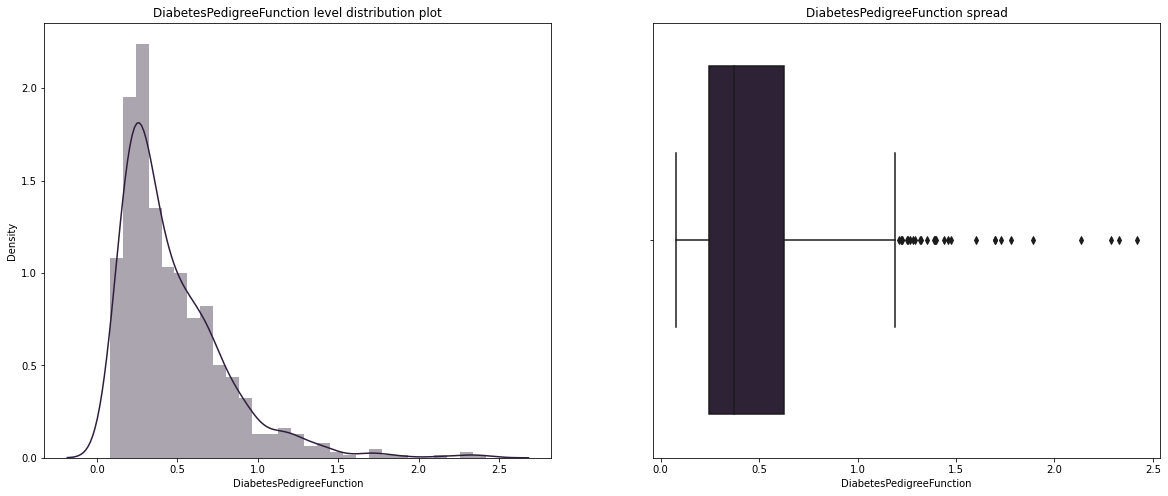

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("DiabetesPedigreeFunction level distribution plot")
sns.distplot(diabetes.DiabetesPedigreeFunction)

plt.subplot(1,2,2)
plt.title("DiabetesPedigreeFunction spread")
sns.boxplot(diabetes.DiabetesPedigreeFunction)

plt.show()

# explanation:-
#  y variable is skewed to right 
#  from 0 to 0.5 shows the non-diabetic people.
#  from 0.5 to 2.5 people are suffering from diabetes.
#  there is outliers we can see from 1.2 to 2.5 in (box plot)

# conclusion:-
#  the people are suffering from DiabetesPedigreeFunction is generally less.
#  if we see boxplot, in DiabetesPedigreeFunction above 50% diabetes have not transmited from parents.

# Categorical column exploration

In [ ]:
sns.set_palette("rainbow")    # calling rainbow palette.

In [ ]:
# taking only categorical columns for analysis.
catcols = diabetes.select_dtypes(include="category").columns
catcols

Index(['Outcome'], dtype='object')

# Bivariate analysis

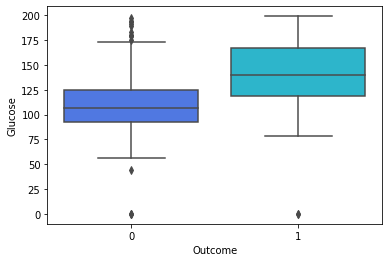

In [ ]:
# we can see that, the people have diabetes and have have glucose level above 140.
# if we look the people are non-diabetic have 110 glucose level or above.
sns.boxplot(x="Outcome",y="Glucose",data=diabetes)

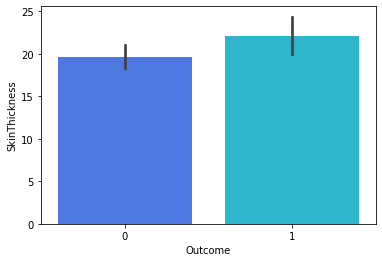

In [ ]:
# the people are suffering from diabetes have 22 skin thickness and above.
# the people are non-diabetic have 19.5 skin thickness level.
sns.barplot(x="Outcome", y="SkinThickness", data=diabetes)

# Examining relation of numerical columns


In [ ]:
# taking numerical columns for further analysis.
diabetes_numeric = diabetes.select_dtypes(include=["float64","int64"])
diabetes_numeric.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35,0,33.6,0.627,50
1,1.0,85,66,29,0,26.6,0.351,31
2,8.0,183,64,0,0,23.3,0.672,32
3,1.0,89,66,23,94,28.1,0.167,21
4,0.0,137,40,35,168,43.1,2.288,33


<Figure size 1440x720 with 0 Axes>

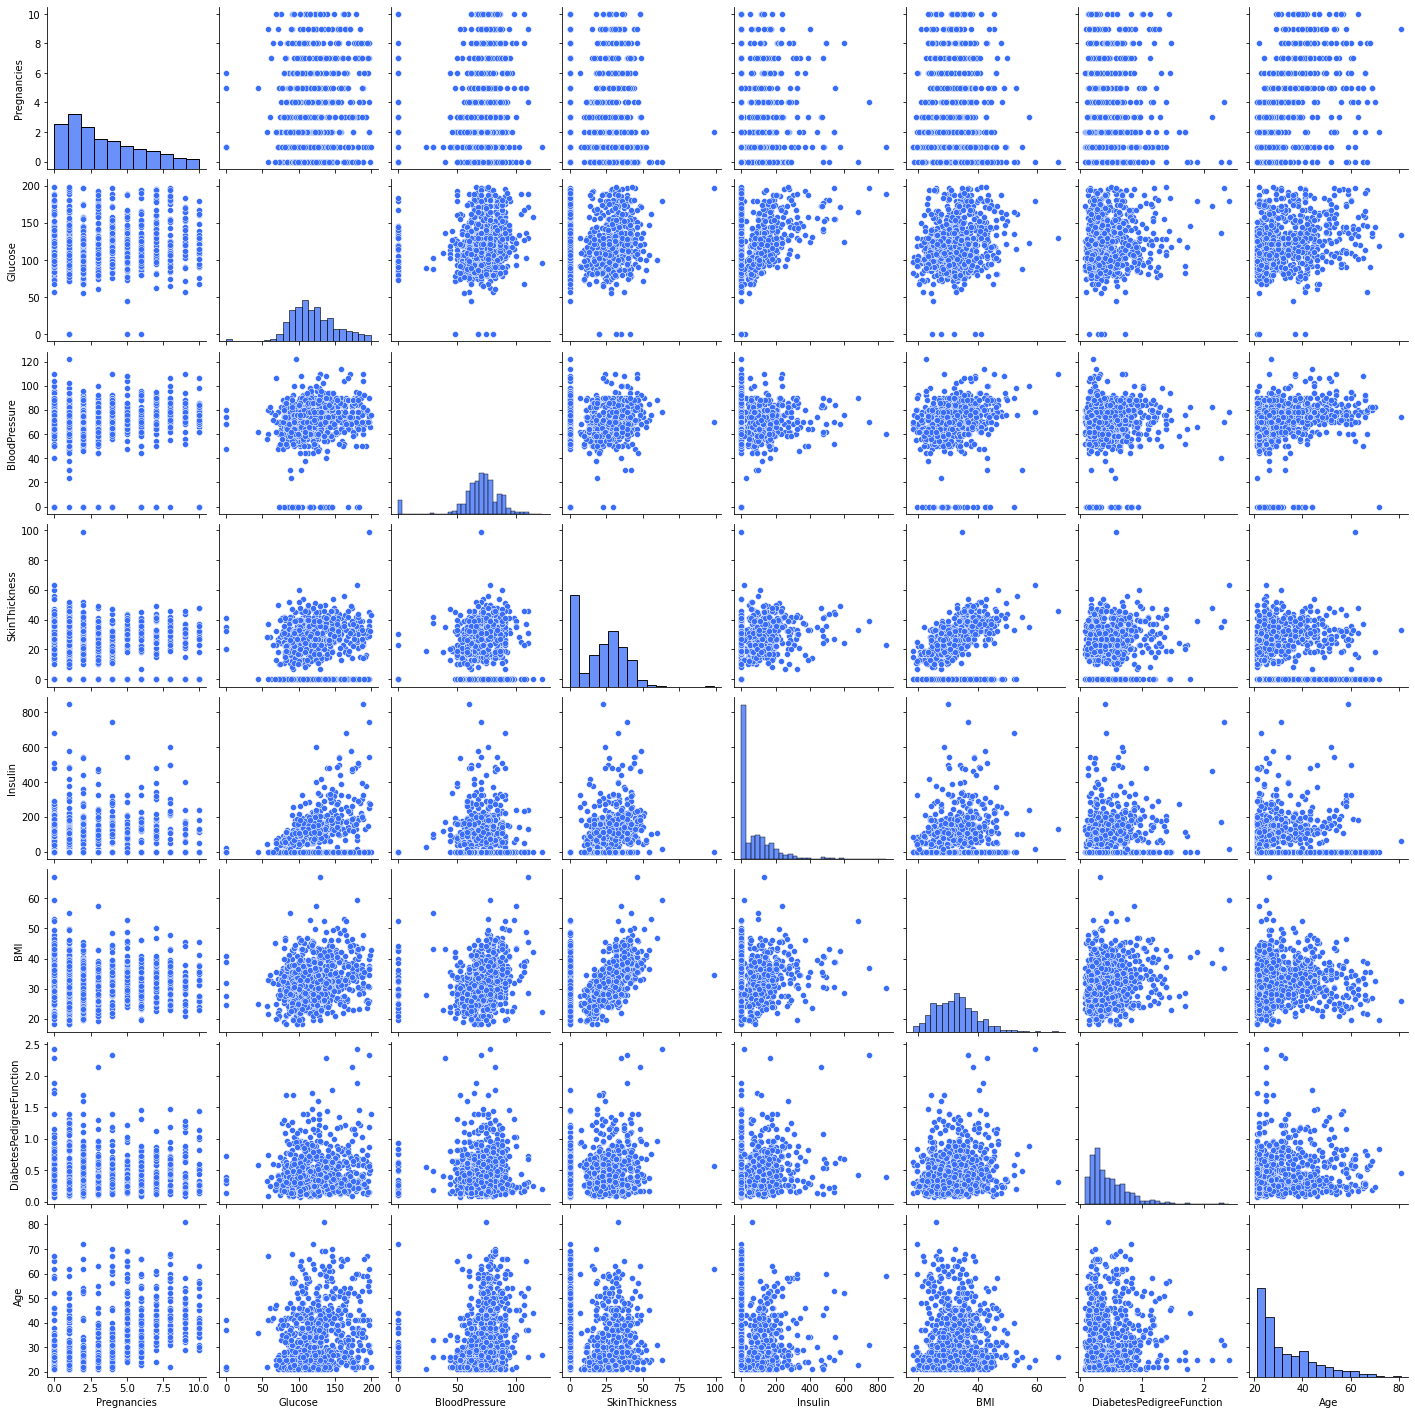

In [ ]:
# pairwise scatter plot.

plt.figure(figsize=(20,10))
sns.pairplot(diabetes_numeric)

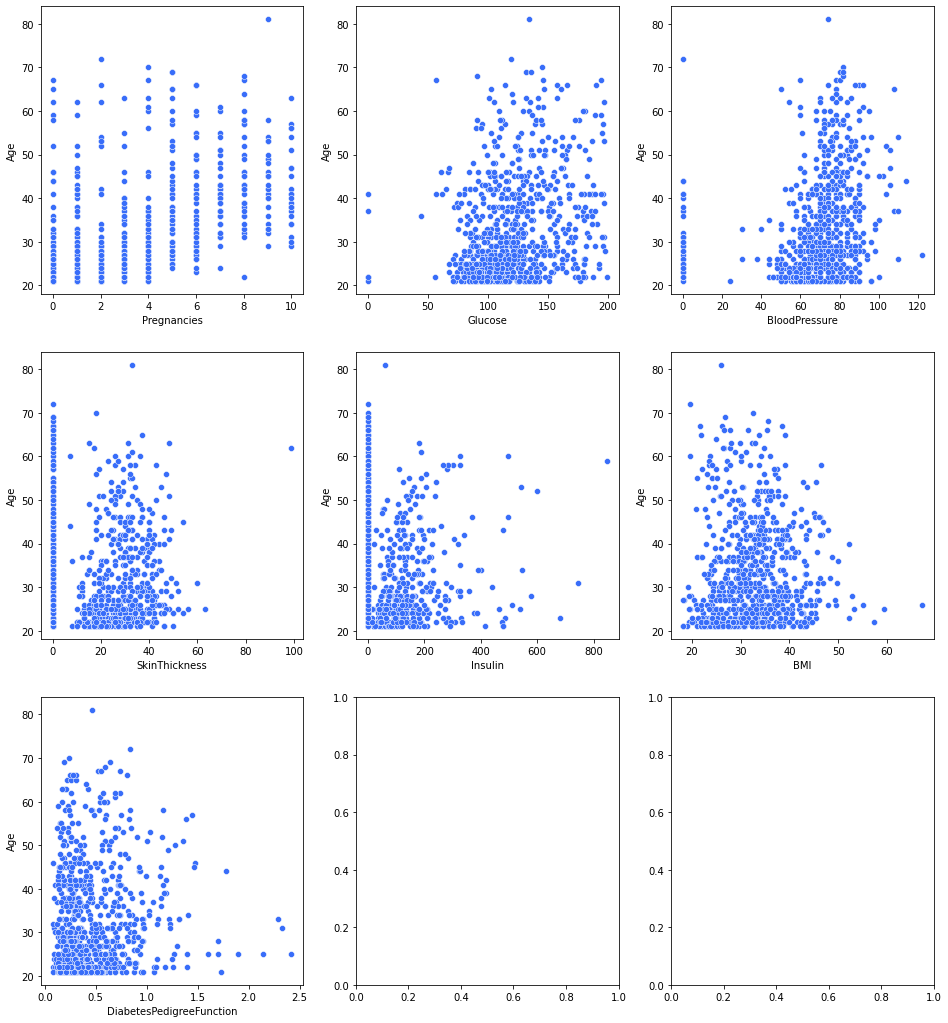

In [ ]:
_,ax= plt.subplots(3,3, figsize=(16,18))
for i in range (len(numericals[:-1])):
  sns.scatterplot(data=diabetes, x=numericals[i], y="Age", ax=ax[i//3][i%3])\

# explanation:-
#  as age is growing we can see the chances of diabetes increase.
#  and other factor is also growing which is indication of diabetes. 

# Pearson correlation

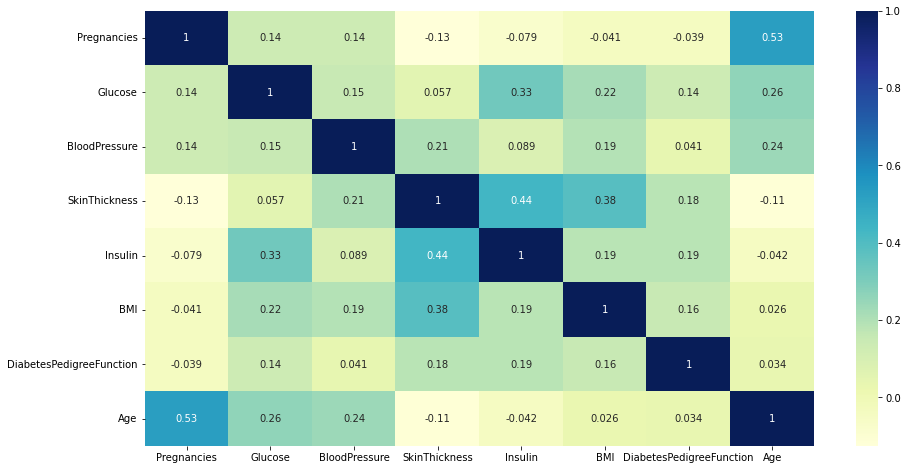

In [ ]:
corr = diabetes_numeric.corr()    # pearson correlation.

plt.figure(figsize=(15,8))
sns.heatmap(corr,  annot=True, cmap="YlGnBu")

# so, we can see the correlation of all columns.
# the highest correlation is "0.53" attribute name is pregnancies with age.
# then we can see insuline correlation with skinthickness which is also fine at "0.44"

# Spearman correlation

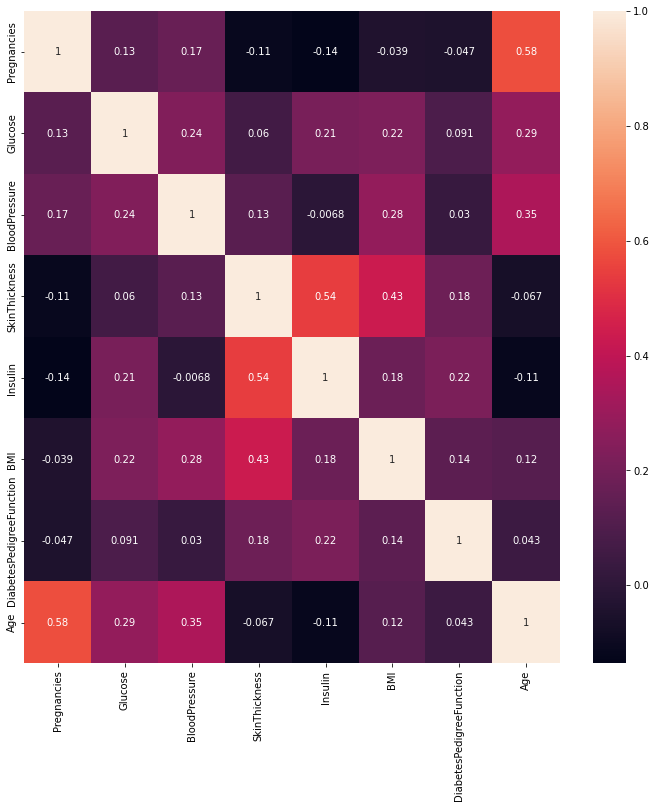

In [ ]:
plt.figure(figsize=(12,12))    # spearman correlation.
sns.heatmap(diabetes[numericals].corr(method="spearman"), annot=True)

# Test and train split feature scaling

In [ ]:
X = diabetes[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]

y = diabetes["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 142)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling from trainig dataset.
sc = StandardScaler()

# get numeric data.
num_X_train = X_train.select_dtypes(exclude=["category"])
# update the cols with normalized values
X_train[num_X_train.columns] = sc.fit_transform(num_X_train)

In [ ]:
# converting string variable to one hot encoding

X_train = pd.get_dummies(X_train)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
379,-1.145240,-0.842892,1.570079,1.126711,-0.068333,1.598585,1.681568,0.170425
10,0.220185,-0.303120,1.171353,-1.297986,-0.711484,0.756887,-0.855846,-0.257719
253,-1.145240,-1.065151,-0.024823,0.691509,-0.711484,0.495670,-0.712162,-0.685863
741,-0.121171,-0.557130,-1.221000,-0.054551,0.128185,-0.229931,-0.216907,-0.600234
328,-0.462528,-0.557130,0.872309,0.940196,0.360434,1.903338,-1.051502,-0.857120
...,...,...,...,...,...,...,...,...
268,-1.145240,-0.557130,-0.822274,-1.297986,-0.711484,-1.057117,-1.201302,-1.028378
511,-1.145240,0.617668,-0.323867,-0.241067,1.164373,-1.492478,-0.806932,-1.028378
411,-0.803884,-0.239617,0.174539,0.567166,0.860663,0.292502,0.174405,-0.685863
197,-0.121171,-0.398374,-0.323867,-0.489753,-0.282717,-1.376382,0.632974,-0.857120


In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# scaling for test dataset

# get numeric data
num_X_test = X_test.select_dtypes(exclude="category")
# update the cols with their normalized values
X_test[num_X_test.columns] = sc.transform(num_X_test)

In [ ]:
# convert string variable to one hot encoding
X_test = pd.get_dummies(X_test)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
405,-0.462528,0.109647,-1.021637,0.691509,0.762404,1.409929,0.149948,-0.600234
250,1.926967,-0.430125,-0.822274,-1.297986,-0.711484,-0.171883,-0.278050,0.769826
125,-0.803884,-1.001648,-1.918769,1.313226,0.172849,3.281981,0.076577,-0.600234
708,1.926967,1.411450,0.473583,-1.297986,-0.711484,0.060309,-0.987303,1.026712
136,-1.145240,-0.620633,0.074858,0.318479,-0.264851,-0.229931,0.385346,-1.028378
...,...,...,...,...,...,...,...,...
165,0.902898,-0.493628,0.274221,-0.178895,0.682010,-0.360540,0.767487,0.684197
130,0.220185,1.697212,0.074858,-0.427582,0.789202,-0.389564,-0.336135,-0.000833
441,-0.462528,-1.160405,-0.124505,0.131964,-0.264851,-0.026763,0.079634,-0.942749
469,0.902898,1.093937,0.473583,1.251055,0.539087,1.990410,0.305861,-0.514605


In [ ]:
X_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Conclusion

In [1]:
# Diabetes is a big problem. In this data set, i have seen if things are increase like: glucose, diabetes pedegree function, skin thickness, blood  pressure that will become a cause of Diabetes.
# if things are reducing like: insulin etc. that is also not good for the health it may take a form of diabetes at the end.

# in this, skin thickness and insulin have a strong connection and age with pregnancies have also a strong connection etc.
